In [1]:
import numpy as np
import pandas as pd
import pymc as pm
from pyei.r_by_c import RowByColumnEI
from pyei.data import Datasets
from pyei.plot_utils import plot_precinct_scatterplot

/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/aesara/link/jax/dispatch.py:87: UserWarning: JAX omnistaging couldn't be disabled: Disabling of omnistaging is no longer supported in JAX version 0.2.12 and higher: see https://github.com/google/jax/blob/main/design_notes/omnistaging.md.
  warnings.warn(f"JAX omnistaging couldn't be disabled: {e}")
/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/pymc/sampling_jax.py:36: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
%load_ext autoreload
%autoreload 2

# Demo of RxC models and plotting using Santa Clara data

We show examples of using and examining models available in pyei using a sample data set:

In [4]:
data = Datasets.Santa_Clara.to_dataframe()
precinct_pops = np.array(data['total2'])
votes_fractions = np.array(data[['pct_for_hardy2', 'pct_for_kolstad2', 'pct_for_nadeem2']]).T
candidate_names = ["Hardy", "Kolstad", "Nadeem"]
group_fractions = np.array(data[['pct_ind_vote', 'pct_e_asian_vote', 'pct_non_asian_vote']]).T
demographic_group_names = ["ind", "e_asian", "non_asian"]

In [5]:
ei = RowByColumnEI(model_name='multinomial-dirichlet')

In [6]:
ei.fit(group_fractions, votes_fractions, precinct_pops, demographic_group_names, candidate_names)

Running ['ind', 'e_asian', 'non_asian'] x ['Hardy', 'Kolstad', 'Nadeem'] EI
r = 3 rows (demographic groups)
c = 3 columns (candidates or voting outcomes)
number of precincts = 42


/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Compiling...


/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/pymc/aesaraf.py:996: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(


Compilation time =  0:00:14.180946
Sampling...


Compiling.. :   0%|                                                       | 0/2500 [00:00<?, ?it/s]

  0%|                                                                     | 0/2500 [00:00<?, ?it/s]

Compiling.. :   0%|                                                       | 0/2500 [00:00<?, ?it/s]


  0%|                                                                     | 0/2500 [00:00<?, ?it/s]


Running chain 0:   0%|                                                    | 0/2500 [00:09<?, ?it/s]


Running chain 3:   0%|                                                    | 0/2500 [00:09<?, ?it/s]

Running chain 0:   5%|██                                       | 125/2500 [00:10<00:23, 102.30it/s]


Running chain 1:   5%|██                                        | 125/2500 [00:11<00:30, 78.76it/s]

Running chain 0:  10%|████                                     | 250/2500 [00:11<00:21, 103.84it/s]


Running chain 0:  15%|██████▎                                   | 375/2500 [00:13<00:2

Sampling time =  0:00:41.283348
Transforming variables...
Transformation time =  0:00:00.691616


We can also pass to the fit() function additional keyword arguments for the sampler, such as:

- draws - the number of samples to draw
- chains - the number of chains
- tune - number of iteration to tune
- cores - number of chains to run in parallel

(see https://docs.pymc.io/api/inference.html sampling.sample for more)

In [7]:
print(ei.summary())


            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                ind for Hardy is
                0.315
                95% equal-tailed credible interval:  [0.10864317 0.55724203]
                The posterior mean for the district-level voting preference of
                ind for Kolstad is
                0.267
                95% equal-tailed credible interval:  [0.08541903 0.50628561]
                The posterior mean for the district-level voting preference of
                ind for Nadeem is
                0.419
                95% equal-tailed credible interval:  [0.18031614 0.66784814]
                The posterior mean for the district-level voting preference of
                e_asian for Hardy is
                0.592
                95% equal-tailed c

<AxesSubplot:title={'center':'Support for Nadeem'}>

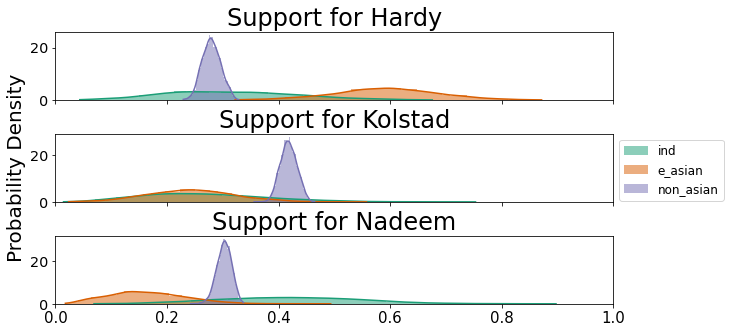

In [8]:
ei.plot()

### If one of there are no-vote or abstain columns, or candidates that we are not interested in:

We can pass a list of candidates/outcomes that we *don't* want to consider and summarize/display support out of those who voted for all *other* candidates. E.g. if we had a column called abstain, we might call `ei.summarize(non_candidate_names=["abstain"])` or `ei.plot(non_candidate_names=["abstain"])` to only report on all columns besides the abstain column. Note that in this case the proportion of each group in the "abstain" column is an estimate, just like their support for each other candidate is an estimate.

In the present example there is not an abstain columnn, but if we wanted to only look at the split of support for Kolstad and Nadeem, and exclude Hardy, we could do so as follows:

In [9]:
print(ei.summary(non_candidate_names=["Hardy"]))


            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                ind for Kolstad is
                0.390
                95% equal-tailed credible interval:  [0.12617048 0.69718421]
                The posterior mean for the district-level voting preference of
                ind for Nadeem is
                0.610
                95% equal-tailed credible interval:  [0.30281579 0.87382952]
                The posterior mean for the district-level voting preference of
                e_asian for Kolstad is
                0.596
                95% equal-tailed credible interval:  [0.30625782 0.85652557]
                The posterior mean for the district-level voting preference of
                e_asian for Nadeem is
                0.404
                95% equal-t

<AxesSubplot:title={'center':'Support for Nadeem'}>

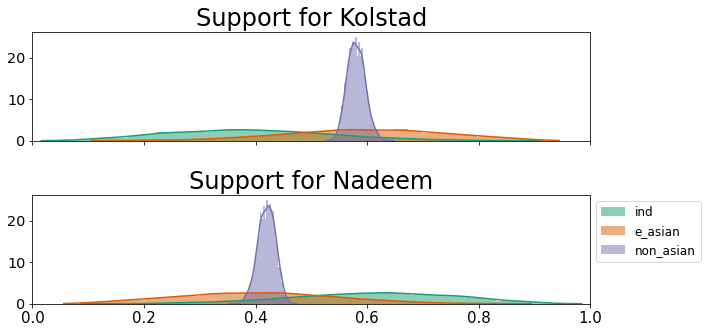

In [10]:
ei.plot(non_candidate_names=["Hardy"])

## Plotting

Here is some of the plotting functionality for the r x c case. For more, see intro_notebooks/Plotting_with_PyEI.ipynb

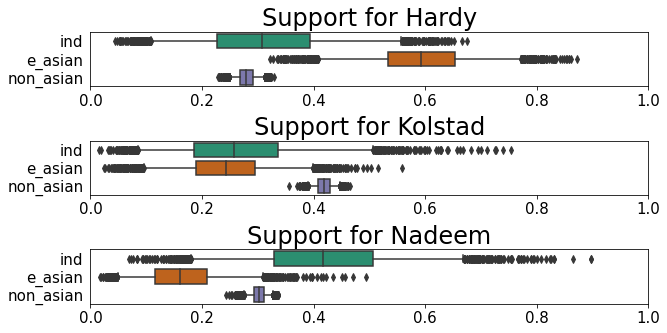

In [11]:
ax = ei.plot_boxplots()

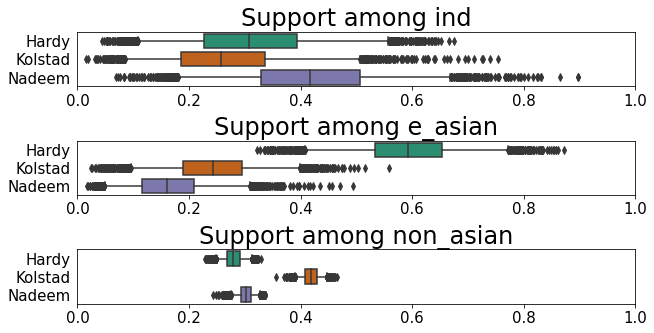

In [12]:
ax = ei.plot_boxplots(plot_by="group")

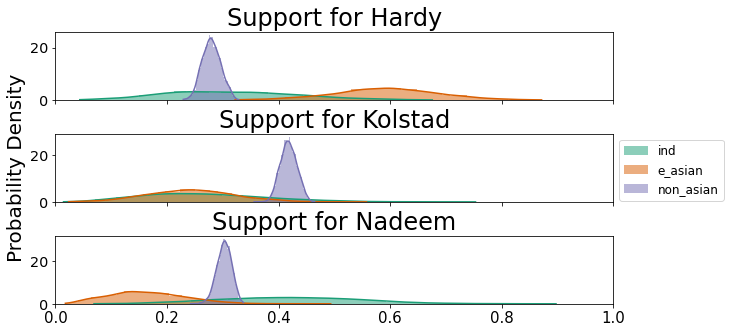

In [13]:
ax = ei.plot_kdes(plot_by="candidate")

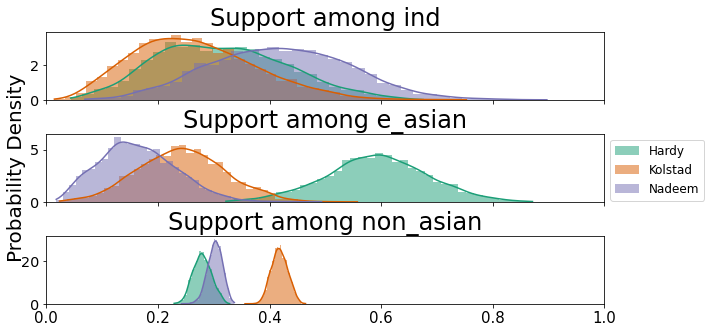

In [14]:
ax = ei.plot_kdes(plot_by="group")

<AxesSubplot:title={'center':'Precinct level estimates of voting preferences'}, xlabel='Percent vote for Hardy', ylabel='Precinct'>

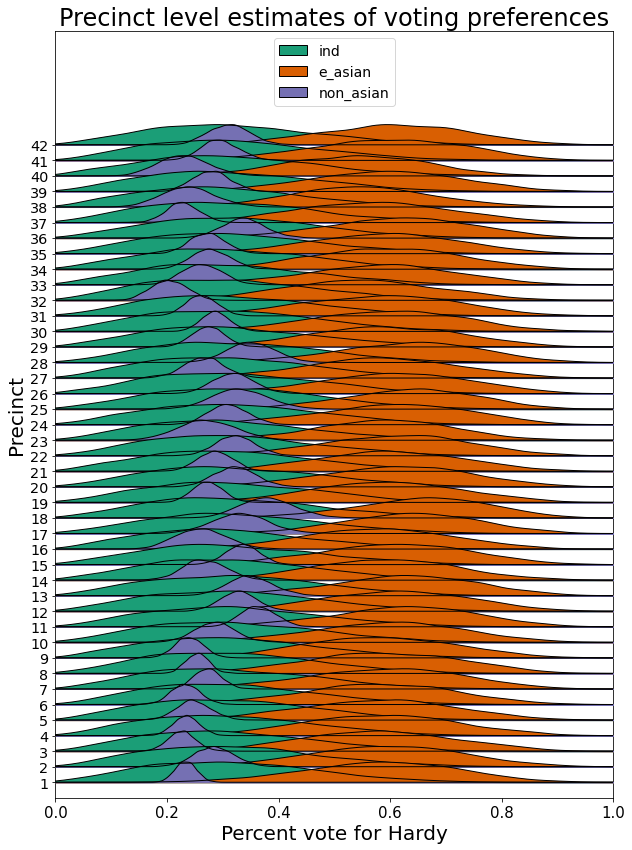

In [15]:
ei.precinct_level_plot("Hardy")

<AxesSubplot:title={'center':'Precinct level estimates of voting preferences'}, xlabel='Percent vote for Nadeem', ylabel='Precinct'>

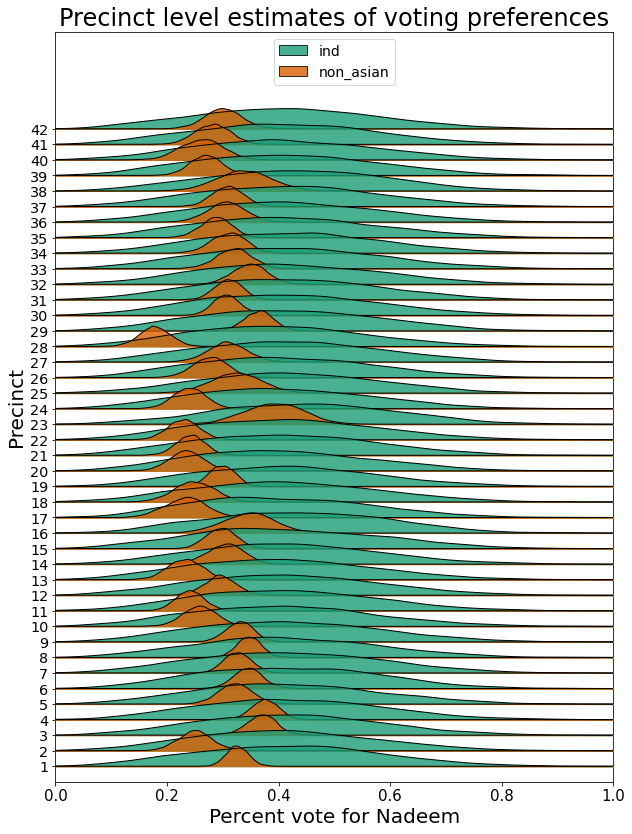

In [16]:
ei.precinct_level_plot("Nadeem", groups=["ind", "non_asian"], alpha=0.8)

<AxesSubplot:title={'center':'e_asian'}, xlabel='Support for Kolstad'>

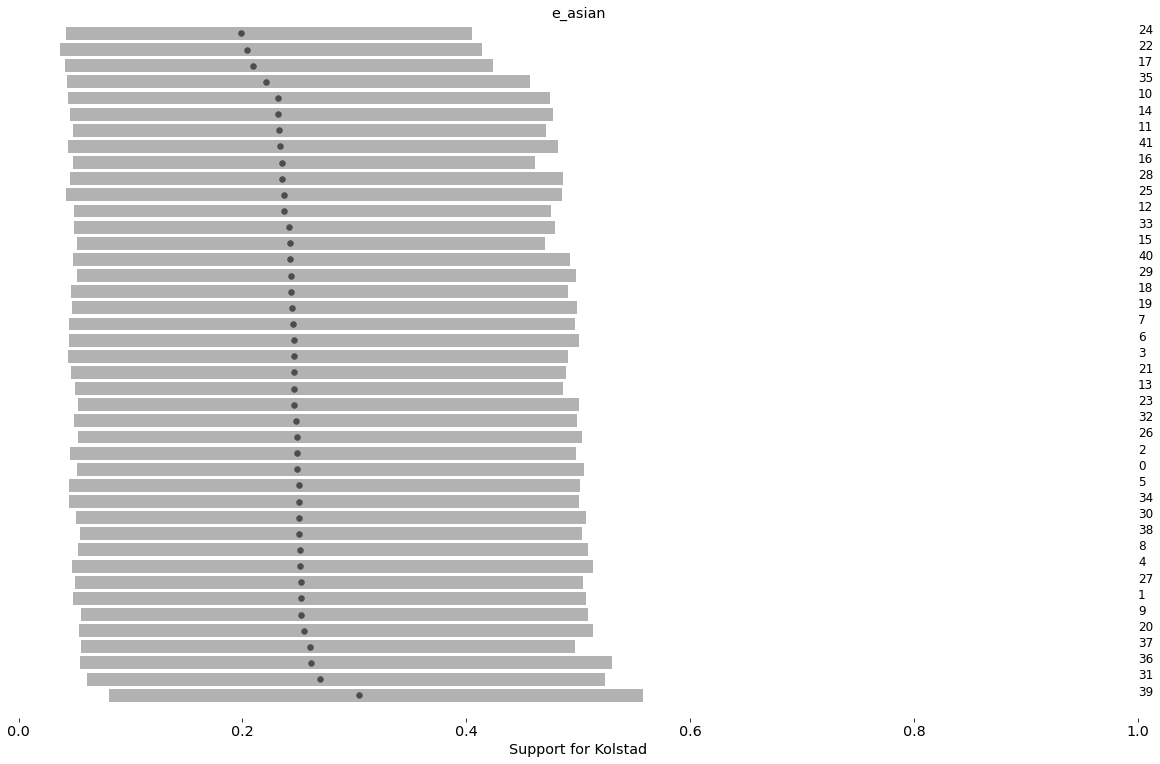

In [17]:
ei.plot_intervals_by_precinct('e_asian', 'Kolstad') # 95% credible intervals by precinct

## Polarization
There are several options for calculating and reporting on polarization that are supported.

### a) Calculate probability that difference in voting preferences between two groups  is above a given threshold

In [18]:
ei.polarization_report(["ind", "e_asian"], "Nadeem", threshold=.50)

There is a 4.8% probability that the difference between the groups' preferences for Nadeem (ind - e_asian)  is more than 0.50.


4.825

In [19]:
ei.polarization_report(["ind", "e_asian"], "Nadeem", threshold=.50, verbose=False)

4.825

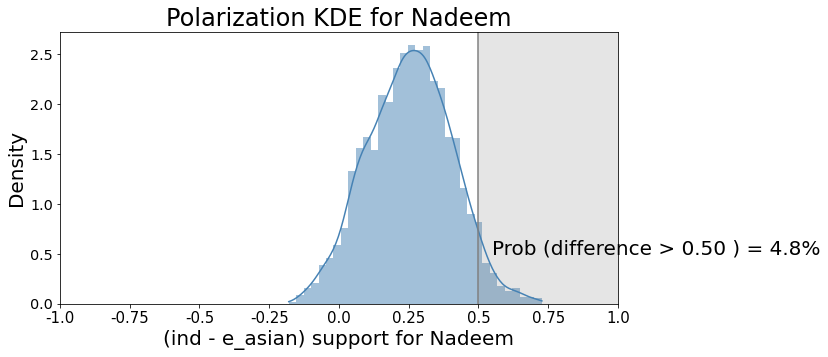

In [20]:
ax = ei.plot_polarization_kde(["ind", "e_asian"], "Nadeem", threshold=0.50, show_threshold=True)

### b) Find central credible interval (with specified probability level) for the difference in voting preferences between two groups

In [21]:
ei.polarization_report(["ind", "e_asian"], "Nadeem", percentile=95)

There is a 95% probability that the difference between the groups' preferences for Nadeem (ind - e_asian) is between [-0.04, 0.54].


(-0.04014619404962515, 0.5422368502056065)

In [22]:
ei.polarization_report(["ind", "e_asian"], "Nadeem", percentile=95, verbose=False)

(-0.04014619404962515, 0.5422368502056065)

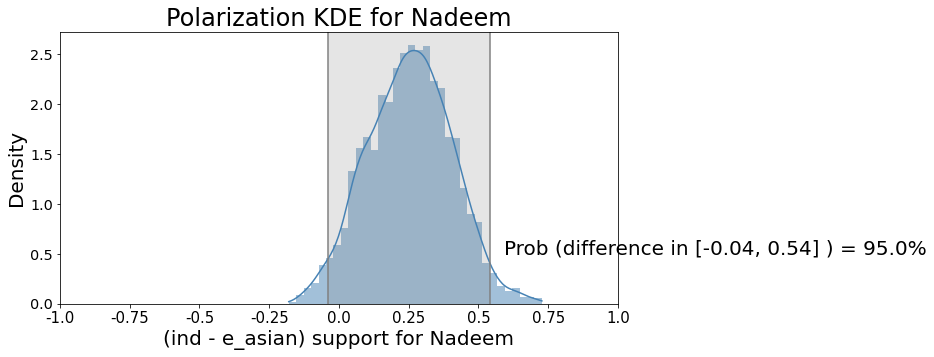

In [23]:
ax = ei.plot_polarization_kde(["ind", "e_asian"], "Nadeem", percentile=95, show_threshold=True)

## Win margins among a demographic group
Suppose we want to understand how a candidate's margin of victory among one demographic group compared to their margin overall. While we can use our input data to determine the Candidate A - Candidate B margin polity-wide, there are several ways to inspect the EI output to determine that margin among a given demographic group. The below functions return credible intervals for the preference margin — (E. Asian preference for Hardy - E. Asian preference for Nadeem). Multiplying these preferences by the total E. Asian population will return estimated the estimated vote counts margin.

In [24]:
ei.margin_report("e_asian", ["Hardy", "Nadeem"], percentile=95, verbose=True)

There is a 95% probability that the difference between e_asians' preferences for Hardy and Nadeem is between [0.14, 0.69].


(0.14171280349816173, 0.6867331854813428)

In [25]:
ei.margin_report("e_asian", ["Hardy", "Nadeem"], percentile=95, verbose=False)

(0.14171280349816173, 0.6867331854813428)

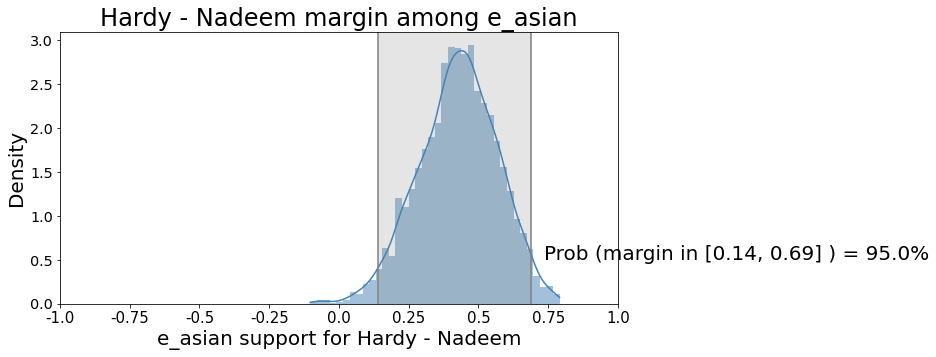

In [26]:
ei.plot_margin_kde("e_asian", ["Hardy", "Nadeem"], percentile=95, show_threshold=True)

In [27]:
ei.margin_report("e_asian", ["Hardy", "Nadeem"], threshold=0.2, verbose=True)

There is a 94.2% probability that the difference between e_asians' preferences for Hardy and Nadeem is more than 0.20.


94.25

In [28]:
ei.margin_report("e_asian", ["Hardy", "Nadeem"], threshold=0.2, verbose=False)

94.25

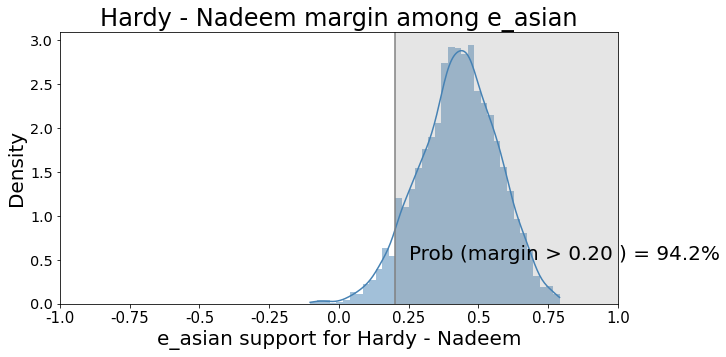

In [29]:
ei.plot_margin_kde("e_asian", ["Hardy", "Nadeem"], threshold=0.2, show_threshold=True)

### c) polarization of preferred candidates

In [30]:
ei.candidate_of_choice_polarization_report()

In 73.625 percent of samples, the district-level candidates of choice for e_asian and ind voters differ.
In 85.125 percent of samples, the district-level candidates of choice for non_asian and ind voters differ.
In 98.75 percent of samples, the district-level candidates of choice for non_asian and e_asian voters differ.


{('e_asian', 'ind'): 0.73625,
 ('ind', 'e_asian'): 0.73625,
 ('non_asian', 'ind'): 0.85125,
 ('ind', 'non_asian'): 0.85125,
 ('non_asian', 'e_asian'): 0.9875,
 ('e_asian', 'non_asian'): 0.9875}

In [31]:
differ_dict = ei.candidate_of_choice_polarization_report(verbose = False)
print(differ_dict[('ind','e_asian')])
print(differ_dict[('e_asian','ind')])

0.73625
0.73625


## Plotting across EI runs
Let's see how different `multinomial-dirichlet-modified` is from `multinomial-dirichlet`

In [32]:
ei_modified = RowByColumnEI(model_name='multinomial-dirichlet-modified', pareto_shape=100, pareto_scale=100)

In [33]:
ei_modified.fit(group_fractions, votes_fractions, precinct_pops, demographic_group_names, candidate_names, tune=2000)

Running ['ind', 'e_asian', 'non_asian'] x ['Hardy', 'Kolstad', 'Nadeem'] EI
r = 3 rows (demographic groups)
c = 3 columns (candidates or voting outcomes)
number of precincts = 42
Compiling...


/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/pymc/aesaraf.py:996: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(


Compilation time =  0:00:12.108091
Sampling...


Compiling.. :   0%|                                                       | 0/3000 [00:00<?, ?it/s]

  0%|                                                                     | 0/3000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                       | 0/3000 [00:00<?, ?it/s]


  0%|                                                                     | 0/3000 [00:00<?, ?it/s]


Compiling.. :   0%|                                                       | 0/3000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                    | 0/3000 [00:16<?, ?it/s]


Running chain 3:   0%|                                                    | 0/3000 [00:16<?, ?it/s]

Running chain 0:   5%|██                                        | 150/3000 [00:22<01:40, 28.30it/s]


Running chain 3:   5%|██                                        | 150/3000 [00:22<01:52, 25.41it/s]


Running chain 3:  10%|████▏                                     | 300/3000 [00:25<01:1

Sampling time =  0:03:40.492640
Transforming variables...
Transformation time =  0:00:01.281120


In [34]:
ei_runs = [ei_modified, ei]
run_names = ['multinomial-dirichlet-modified', 'multinomial-dirichlet']

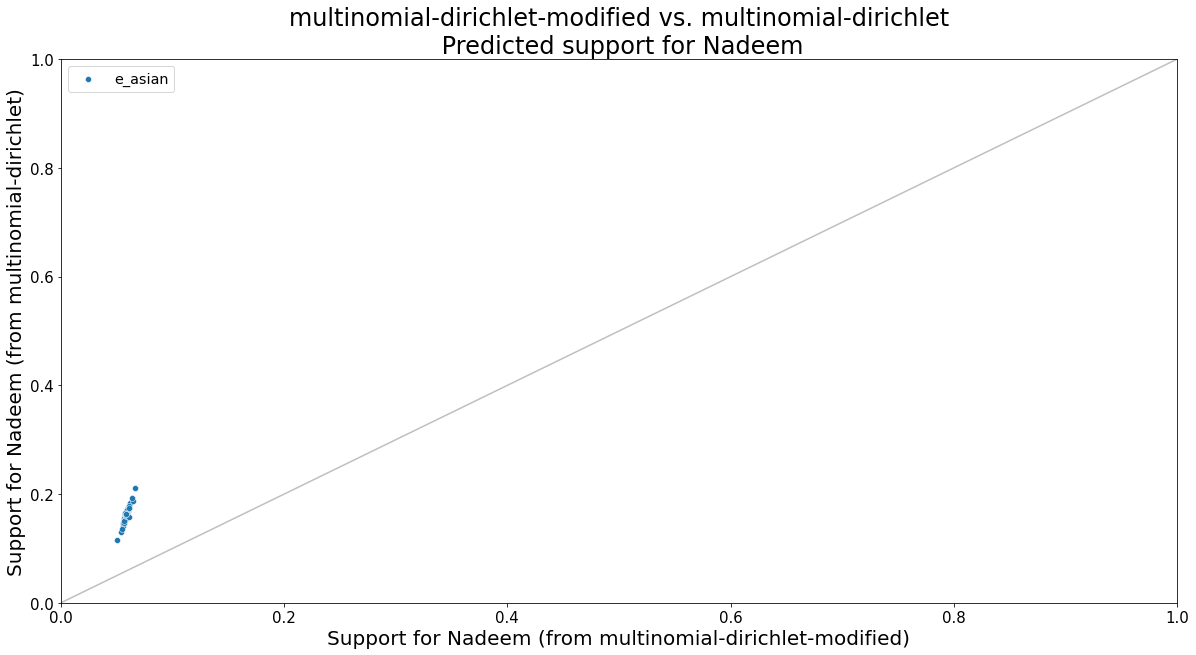

In [35]:
ax = plot_precinct_scatterplot(ei_runs, run_names, "Nadeem", "e_asian")

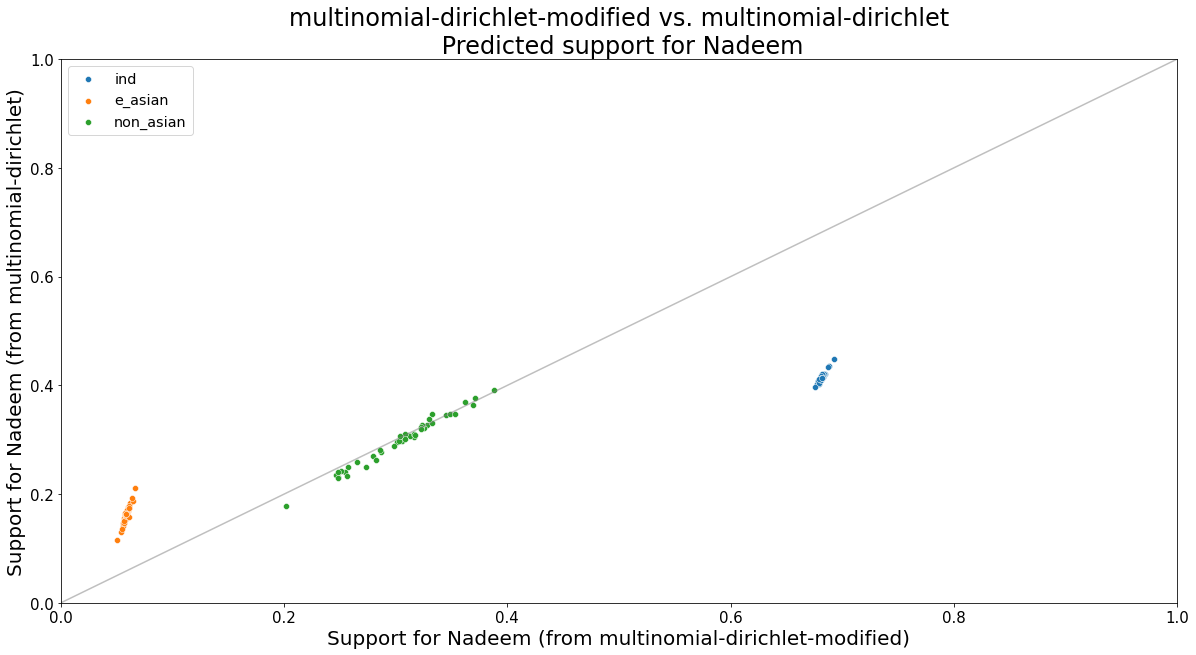

In [36]:
ax = plot_precinct_scatterplot(ei_runs, run_names, "Nadeem")

This tells us that the `multinomial-dirichlet` version seemed to overestimate Nadeem's support among East Asians and underestimate Nadeem's support among Indians, relative to the `multinomial-dirichlet-modified` version.

## Summaries

RowByColumnEI objects have methods for text summaries and summary statistics.

In [37]:
# new
print(ei.summary())


            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                ind for Hardy is
                0.315
                95% equal-tailed credible interval:  [0.10864317 0.55724203]
                The posterior mean for the district-level voting preference of
                ind for Kolstad is
                0.267
                95% equal-tailed credible interval:  [0.08541903 0.50628561]
                The posterior mean for the district-level voting preference of
                ind for Nadeem is
                0.419
                95% equal-tailed credible interval:  [0.18031614 0.66784814]
                The posterior mean for the district-level voting preference of
                e_asian for Hardy is
                0.592
                95% equal-tailed c

In [38]:
print(ei.summary())


            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                ind for Hardy is
                0.315
                95% equal-tailed credible interval:  [0.10864317 0.55724203]
                The posterior mean for the district-level voting preference of
                ind for Kolstad is
                0.267
                95% equal-tailed credible interval:  [0.08541903 0.50628561]
                The posterior mean for the district-level voting preference of
                ind for Nadeem is
                0.419
                95% equal-tailed credible interval:  [0.18031614 0.66784814]
                The posterior mean for the district-level voting preference of
                e_asian for Hardy is
                0.592
                95% equal-tailed c

In [39]:
ei.candidate_of_choice_report()

ind
     - In 26.75 percent of samples, the district-level vote preference of 
       ind for Hardy was higher than for any other candidate.
     - In 14.875 percent of samples, the district-level vote preference of 
       ind for Kolstad was higher than for any other candidate.
     - In 58.375 percent of samples, the district-level vote preference of 
       ind for Nadeem was higher than for any other candidate.
e_asian
     - In 98.45 percent of samples, the district-level vote preference of 
       e_asian for Hardy was higher than for any other candidate.
     - In 1.25 percent of samples, the district-level vote preference of 
       e_asian for Kolstad was higher than for any other candidate.
     - In 0.3 percent of samples, the district-level vote preference of 
       e_asian for Nadeem was higher than for any other candidate.
non_asian
     - In 0.0 percent of samples, the district-level vote preference of 
       non_asian for Hardy was higher than for any other candidate

{('ind', 'Hardy'): 0.2675,
 ('ind', 'Kolstad'): 0.14875,
 ('ind', 'Nadeem'): 0.58375,
 ('e_asian', 'Hardy'): 0.9845,
 ('e_asian', 'Kolstad'): 0.0125,
 ('e_asian', 'Nadeem'): 0.003,
 ('non_asian', 'Hardy'): 0.0,
 ('non_asian', 'Kolstad'): 1.0,
 ('non_asian', 'Nadeem'): 0.0}

In [40]:
ei.candidate_of_choice_report(verbose = False)

{('ind', 'Hardy'): 0.2675,
 ('ind', 'Kolstad'): 0.14875,
 ('ind', 'Nadeem'): 0.58375,
 ('e_asian', 'Hardy'): 0.9845,
 ('e_asian', 'Kolstad'): 0.0125,
 ('e_asian', 'Nadeem'): 0.003,
 ('non_asian', 'Hardy'): 0.0,
 ('non_asian', 'Kolstad'): 1.0,
 ('non_asian', 'Nadeem'): 0.0}

### Posterior means of voting preference for each group/candidate:

In [41]:
posterior_mean_voting_prefs = ei.posterior_mean_voting_prefs
df = pd.DataFrame(posterior_mean_voting_prefs, columns=candidate_names, index=demographic_group_names)
df.head()

,Hardy,Kolstad,Nadeem
ind,0.314625,0.266723,0.418653
e_asian,0.592245,0.242962,0.164794
non_asian,0.279580,0.418014,0.302406


### 95% equal-tailed credible intervals for voting preferences for each group:

In [42]:
num_groups, num_candidates = ei.num_groups_and_num_candidates # R, C
credible_interval_95_mean_voting_prefs = ei.credible_interval_95_mean_voting_prefs
for r in range(num_groups):
    for c in range(num_candidates):
        print(demographic_group_names[r],candidate_names[c], credible_interval_95_mean_voting_prefs[r][c])

ind Hardy [0.10864317 0.55724203]
ind Kolstad [0.08541903 0.50628561]
ind Nadeem [0.18031614 0.66784814]
e_asian Hardy [0.40862693 0.77164495]
e_asian Kolstad [0.09515124 0.3981642 ]
e_asian Nadeem [0.04868715 0.30910777]
non_asian Hardy [0.24878738 0.3124029 ]
non_asian Kolstad [0.39018174 0.44681415]
non_asian Nadeem [0.27498468 0.32642753]


### Precinct-level means and credible intervals:

In [43]:
precinct_posterior_means, precinct_credible_intervals = ei.precinct_level_estimates()
# Note: precinct_posterior_means has shape num_precincts x r x c
# Note: precinct_credible_intervals has shape num_precincts x r x c x 2 
r = 0
c = 0
print(f'Precinct support for {candidate_names[c]} among {demographic_group_names[r]}')
print(precinct_posterior_means[:,r,c])
print(f'95% credible intervals of precinct support for {candidate_names[c]} among {demographic_group_names[r]}')
print(precinct_credible_intervals[:,r,c])

Precinct support for Hardy among ind
[0.31465242 0.3175916  0.30889002 0.31050689 0.31244645 0.31314958
 0.31447329 0.31613862 0.31446307 0.31955352 0.32225614 0.32122146
 0.32497121 0.31486016 0.31759513 0.30349718 0.32481979 0.3208124
 0.31700265 0.32364997 0.31627598 0.31831545 0.30808541 0.32154587
 0.32866668 0.32008986 0.31207805 0.32683402 0.31571876 0.31638153
 0.31566999 0.30905289 0.31125109 0.31213861 0.31548492 0.32517296
 0.31291331 0.29511548 0.31411649 0.31192852 0.31750787 0.31895797]
95% credible intervals of precinct support for Hardy among ind
[[0.06318467 0.62795215]
 [0.07216715 0.64289781]
 [0.06731932 0.61841524]
 [0.06983073 0.61009955]
 [0.06518494 0.61909168]
 [0.07219886 0.62750824]
 [0.06718161 0.62980009]
 [0.06998521 0.62692944]
 [0.06766727 0.63169993]
 [0.06658148 0.627445  ]
 [0.07023704 0.63340228]
 [0.06552552 0.63731653]
 [0.06904909 0.63991967]
 [0.05955043 0.62229156]
 [0.06226412 0.63038415]
 [0.06604359 0.60421223]
 [0.0677049  0.63967151]
 [0.06

## Samples

Samples from the posterior are accessible. 

Precinct level samples are aggregated into district level preference samples by weighting each precinct by its population:

In [44]:
ei.sampled_voting_prefs.shape # ei.sampled_voting_prefs is samples of district-level voter preference: num_samples x r x c

(4000, 3, 3)

Samples can also be obtained directly by the parameter name in the model:

In [48]:
ei.sim_trace["posterior"]["b"].shape # ei.sim_trace["b"] is samples of precinct-level voter preference: num_chains x num_samples x num_precincts x r x c

#can combine all chains together and convert to a numpy array with:
#np.transpose(ei.sim_trace["posterior"]["b"].stack(all_draws=["chain", "draw"]).values, axes=(3, 0, 1, 2)) # 

(4, 1000, 42, 3, 3)

Samples of hyperparameters are available:

In [50]:
ei_modified.sim_trace["posterior"]["kappa"]

<xarray.DataArray 'kappa' (chain: 4, draw: 1000, kappa_dim_0: 3)>
array([[[100.51934329, 100.07052983, 100.62286639],
        [101.55514431, 101.53146055, 100.33837695],
        [100.09313006, 100.92025148, 100.70568946],
        ...,
        [101.64515941, 101.65582634, 102.47331407],
        [100.56294404, 100.753056  , 100.3897879 ],
        [101.12582326, 100.34798697, 100.22492092]],

       [[100.20270952, 101.79038388, 100.14986683],
        [100.17995282, 102.92026175, 100.25035229],
        [100.80765832, 101.91143015, 100.32066057],
        ...,
        [103.62623079, 100.88001704, 100.03528408],
        [100.05607296, 100.67816864, 100.00821975],
        [100.06266998, 100.53771871, 100.01139823]],

       [[100.62876534, 100.52616793, 102.40686563],
        [101.29473414, 100.43520321, 100.16110528],
        [102.00339196, 100.13876997, 100.78750599],
        ...,
        [101.36968159, 100.25949025, 101.3283753 ],
        [101.33099681, 100.70772552, 101.27075041],
        [101.58662828, 100.75460934, 101.53471081]],

       [[100.47144877, 101.32160014, 103.51971925],
        [101.38305521, 100.85535433, 100.13585992],
        [101.25790807, 103.47451719, 100.07632205],
        ...,
        [100.59751332, 100.92093289, 100.18342591],
        [101.0347562 , 102.21965205, 100.47405292],
        [103.0677611 , 100.44212302, 102.21704103]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * kappa_dim_0  (kappa_dim_0) int64 0 1 2

### Accessing (and visualizing) the pymc model

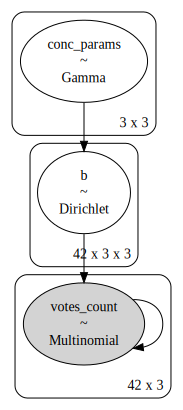

In [51]:
model = ei.sim_model
pm.model_to_graphviz(model)